In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # geração de gráficos
import seaborn as sns # geração de gráficos

from sklearn.ensemble import RandomForestClassifier

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")

Percebe-se um número maior de features no dataset de treino.  
Portanto, algumas features de treino não devem ser usadas na análise.

In [10]:
print(df_train.shape)
print(df_test.shape)

(13730, 167)
(4570, 43)


A variável alvo se encontra no dataset de Treino. Ela não está presente em Teste.

In [7]:
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

É preciso colocar o dataset Treino com as mesmas colunas do dataset Teste, mais a variável alvo.

In [14]:
used_columns = df_test.columns.tolist()
used_columns.append('IN_TREINEIRO')
df_train = df_train[used_columns]

Agora treino só tem uma coluna a mais do que teste (IN_TREINEIRO). 

In [15]:
print(df_train.shape)
print(df_test.shape)

(13730, 44)
(4570, 43)


Podemos então realizar a análise exploratória nos dados de Treino

In [18]:
df_pivot = pd.DataFrame({'types': df_train.dtypes,
                         'nulls': df_train.isna().sum(),
                          '% nulls': df_train.isna().sum() / df_train.shape[0],
                          'size': df_train.shape[0],
                          'uniques': df_train.nunique()})
df_pivot

,types,nulls,% nulls,size,uniques
NU_INSCRICAO,object,0,0.000000,13730,13730
CO_UF_RESIDENCIA,int64,0,0.000000,13730,27
SG_UF_RESIDENCIA,object,0,0.000000,13730,27
NU_IDADE,int64,0,0.000000,13730,55
TP_SEXO,object,0,0.000000,13730,2
TP_COR_RACA,int64,0,0.000000,13730,6
TP_NACIONALIDADE,int64,0,0.000000,13730,5
TP_ST_CONCLUSAO,int64,0,0.000000,13730,4
TP_ANO_CONCLUIU,int64,0,0.000000,13730,11
TP_ESCOLA,int64,0,0.000000,13730,4


Analisando a correlação entre as features e a variável alvo

In [44]:
df_train.corr()['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CH            0.094692
TP_PRESENCA_CN            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
TP_COR_RACA               0.009676
TP_STATUS_REDACAO         0.006688
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
NU_NOTA_COMP1            -0.008709
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
NU_NOTA_COMP2            -0.023308
NU_NOTA_COMP5            -0.025811
NU_NOTA_COMP4            -0.025958
NU_NOTA_REDACAO          -0.026328
NU_NOTA_LC               -0.028261
NU_NOTA_COMP3            -0.030147
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
NU_NOTA_CN               -0.037874
NU_NOTA_CH               -0.053460
TP_ESCOLA                -0.244562
TP_ANO_CONCLUIU     

In [28]:
# features mais correlacionadas
features_correlacao = ['IN_TREINEIRO','TP_ST_CONCLUSAO','NU_IDADE',
                      'TP_ANO_CONCLUIU','TP_ESCOLA']

In [29]:
# colunas sem a variável alvo
features = ['TP_ST_CONCLUSAO','NU_IDADE',
                      'TP_ANO_CONCLUIU','TP_ESCOLA']

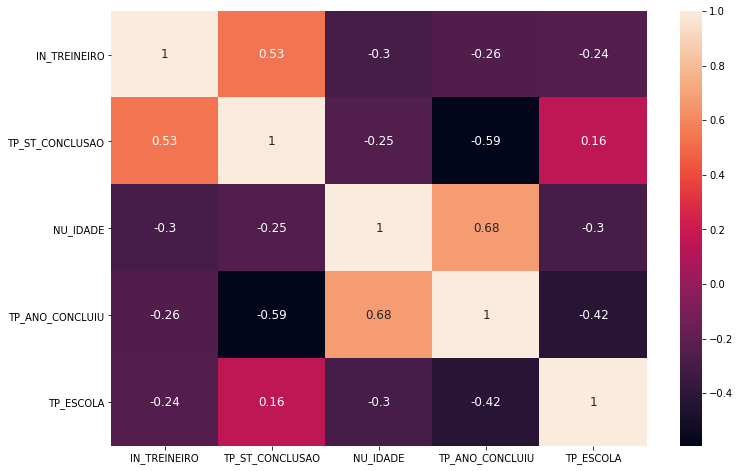

In [30]:
# plotando a matrix de correlação somente com estas features
correlacao2 = df_train[features_correlacao].corr()
axis = plt.subplots(figsize = (12,8))
sns.heatmap(correlacao2, annot=True, annot_kws = {"size":12})

Identificada as colunas mais importantes, vamos tratar os dados ausentes

In [33]:
df_train[features_correlacao].isnull().sum()

IN_TREINEIRO       0
TP_ST_CONCLUSAO    0
NU_IDADE           0
TP_ANO_CONCLUIU    0
TP_ESCOLA          0
dtype: int64

In [35]:
df_test[features].isnull().sum()

TP_ST_CONCLUSAO    0
NU_IDADE           0
TP_ANO_CONCLUIU    0
TP_ESCOLA          0
dtype: int64

Separando as variáveis para aplicação do modelo

In [39]:
num_inscricao = df_test['NU_INSCRICAO']

y_train = df_train['IN_TREINEIRO']

X_train = df_train[features]
X_test = df_test[features]

Prevendo os treineiros utilizando o modelo de **Random Forest**.

In [38]:
random_forest = RandomForestClassifier(n_estimators=500)

random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
predict = random_forest.predict(X_test)
predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Preparando arquivo para submissão ao desafio

In [42]:
# gerar arquivo csv
submission = pd.DataFrame({
    "NU_INSCRICAO": num_inscricao,
    "IN_TREINEIRO": predict
})

submission.to_csv('answer.csv', index=False)
print("Arquivo gerado com sucesso")
submission

Arquivo gerado com sucesso


,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0
